## Notebook Imports

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline 

## Gather Data

[Source: Original Research Paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data points and features

In [7]:
boston_dataset.data.shape

(506, 13)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price
data['PRICE'] = boston_dataset.target

In [11]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - checking for missing values

In [14]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

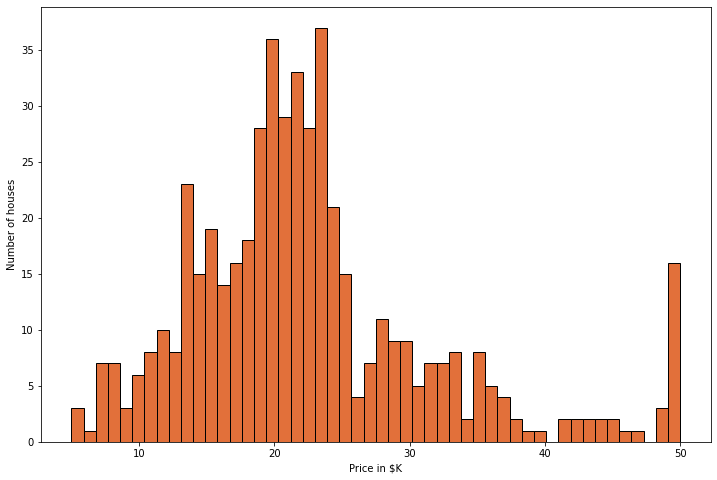

In [16]:
plt.figure(figsize=(12, 8))
plt.hist(data.PRICE, bins=50, ec='black', color="#e2703a") # bins = number of bars in histogram. ec = borders of bars
plt.xlabel('Price in $K')
plt.ylabel('Number of houses')
plt.show()

C:\Users\Maciek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


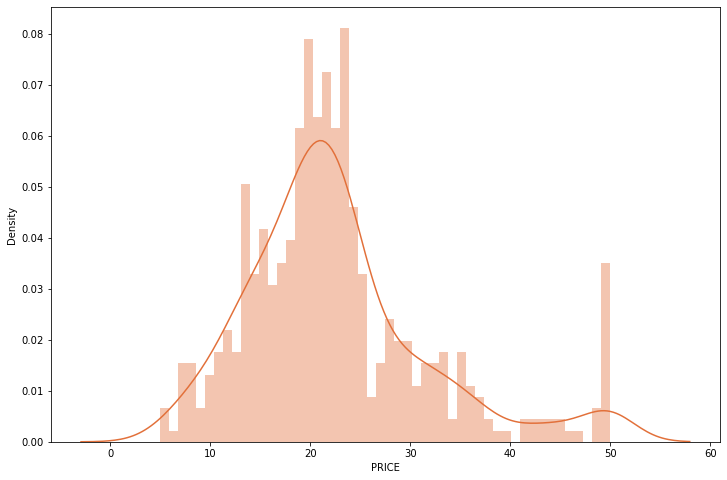

In [17]:
 plt.figure(figsize=(12, 8))
sns.distplot(data['PRICE'], bins=50, color="#e2703a")
plt.show()

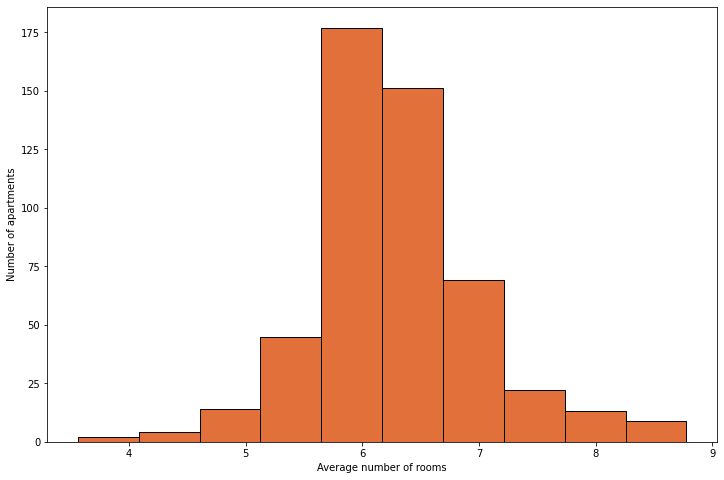

In [18]:
plt.figure(figsize=(12, 8))
plt.hist(data.RM, ec='black', color="#e2703a")
plt.xlabel('Average number of rooms')
plt.ylabel('Number of apartments')
plt.show()

In [19]:
data.RM.mean()

6.284634387351787

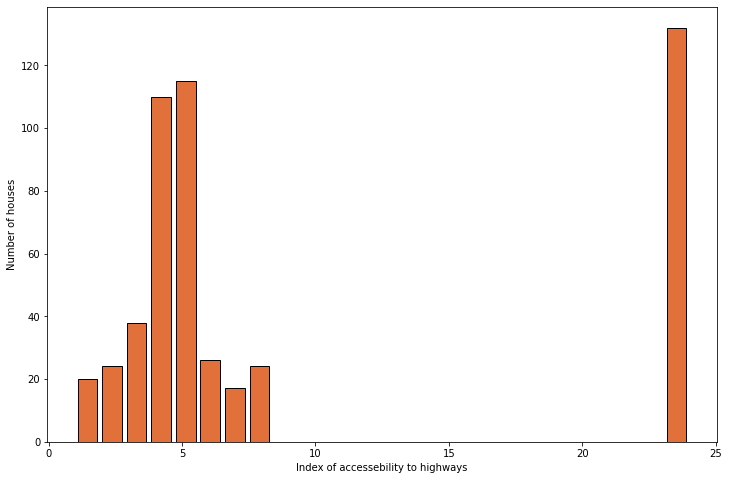

In [20]:
plt.figure(figsize=(12, 8))
plt.hist(data.RAD, ec='black', color="#e2703a", bins=25, rwidth=0.8) # bins = number of bars in histogram. ec = borders of bars
plt.xlabel('Index of accessebility to highways')
plt.ylabel('Number of houses')
plt.show()

In [21]:
data.RAD.value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

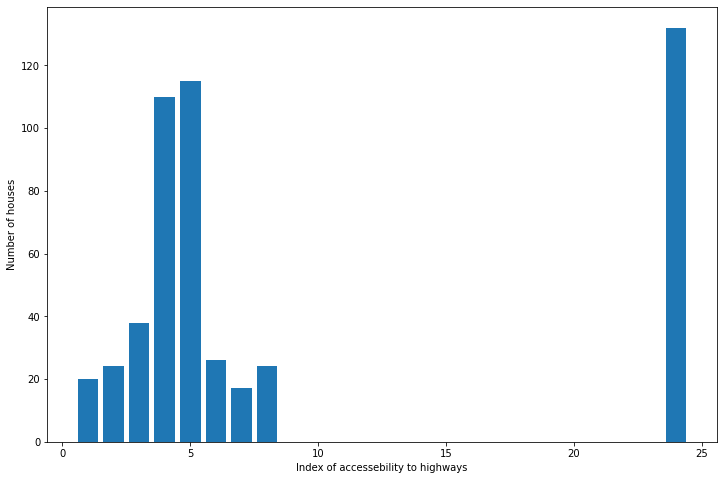

In [22]:
frequency = data.RAD.value_counts()
# type(frequency)
# frequency.index
# frequency.axes[0]
plt.figure(figsize=(12, 8))
plt.bar(frequency.index, height=frequency)
plt.xlabel('Index of accessebility to highways')
plt.ylabel('Number of houses')
plt.show()

In [23]:
data.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [24]:
data.PRICE.corr(data.RM)

0.695359947071539

In [25]:
data.PRICE.corr(data.PTRATIO)

-0.5077866855375615

In [26]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [27]:
mask = np.zeros_like(data.corr())

In [28]:
triangle_indices = np.triu_indices_from(mask)

In [29]:
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

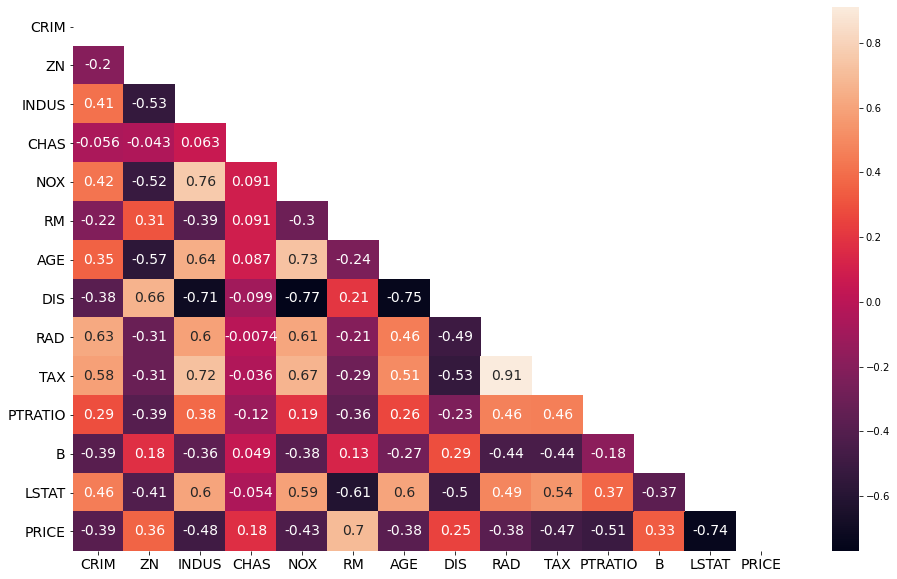

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

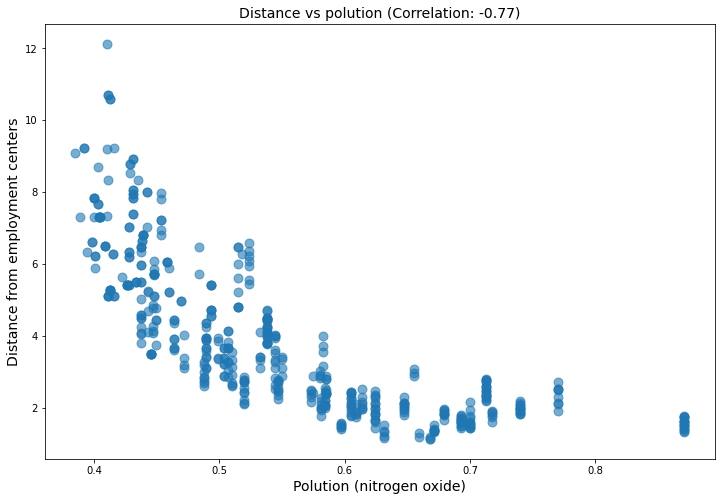

In [31]:
nox_dis_corr = round(data.NOX.corr(data.DIS), 2)

plt.figure(figsize=(12,8))
plt.title(f"Distance vs polution (Correlation: {nox_dis_corr})", fontsize=14)
plt.scatter(data.NOX, data.DIS, alpha=0.6, s=80)
plt.xlabel("Polution (nitrogen oxide)", fontsize=14)
plt.ylabel("Distance from employment centers", fontsize=14)
plt.show()

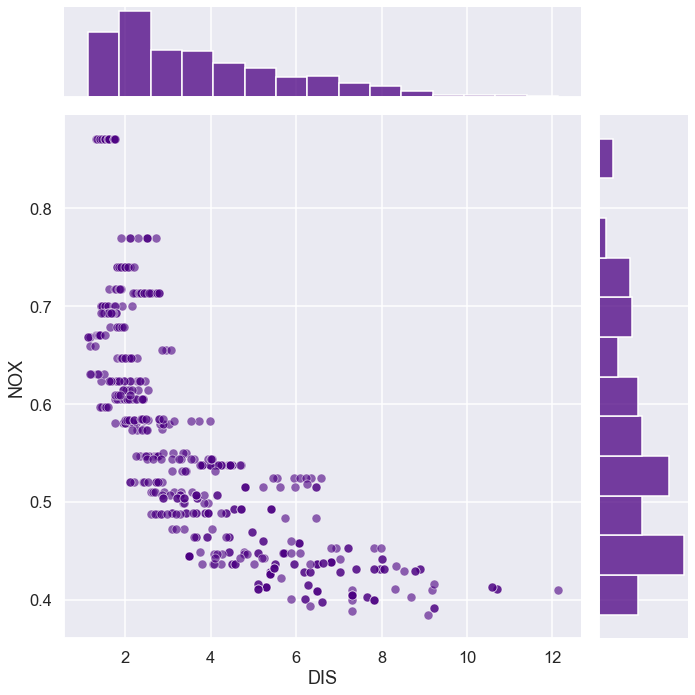

In [32]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=data.DIS, y=data.NOX, height=10, color='indigo', joint_kws={'alpha': 0.6})
plt.show()

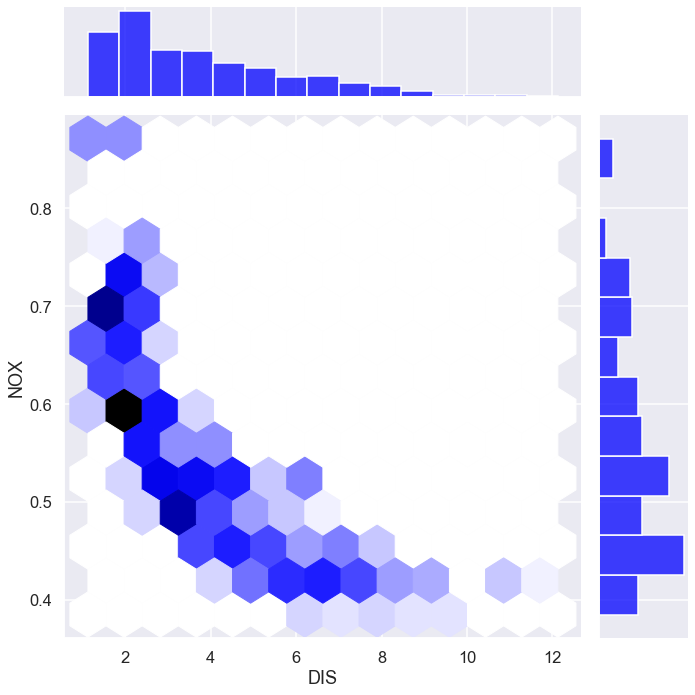

In [33]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=data.DIS, y=data.NOX, height=10, color='blue', kind='hex')
plt.show()

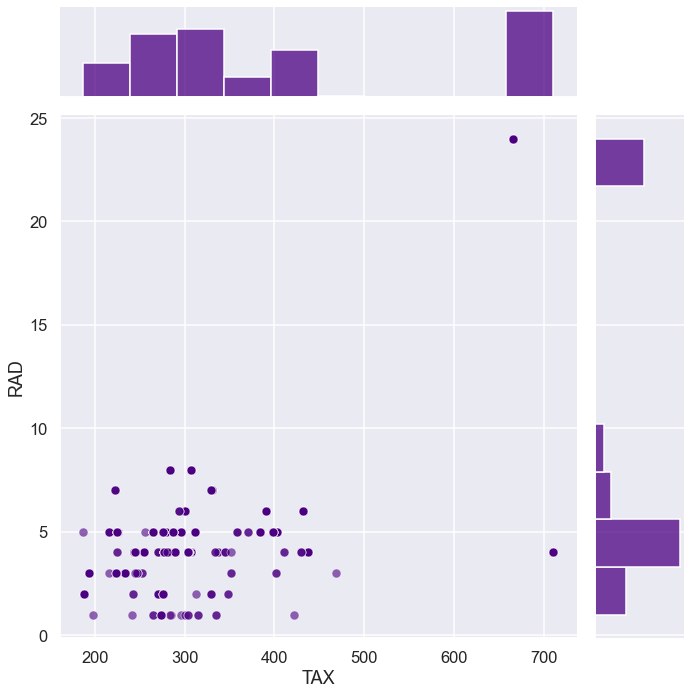

In [34]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=data.TAX, y=data.RAD, height=10, color='indigo', joint_kws={'alpha': 0.6})
plt.show()

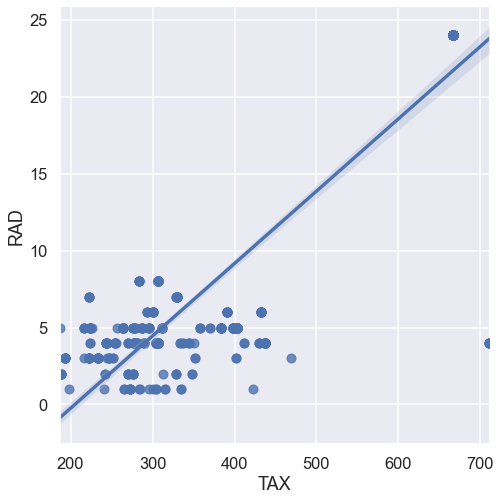

In [35]:
sns.lmplot(x='TAX', y='RAD', data=data, height=7)

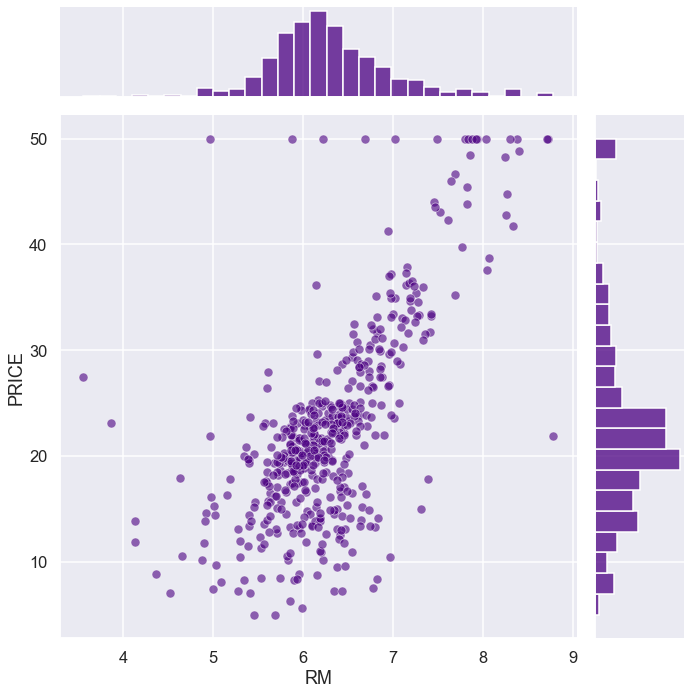

In [36]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=data.RM, y=data.PRICE, height=10, color='indigo', joint_kws={'alpha': 0.6})
plt.show()

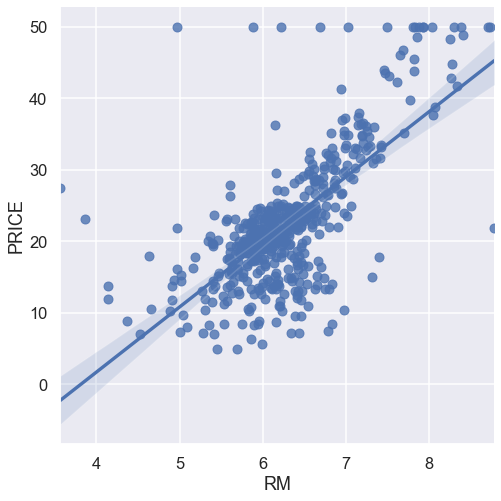

In [37]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7)

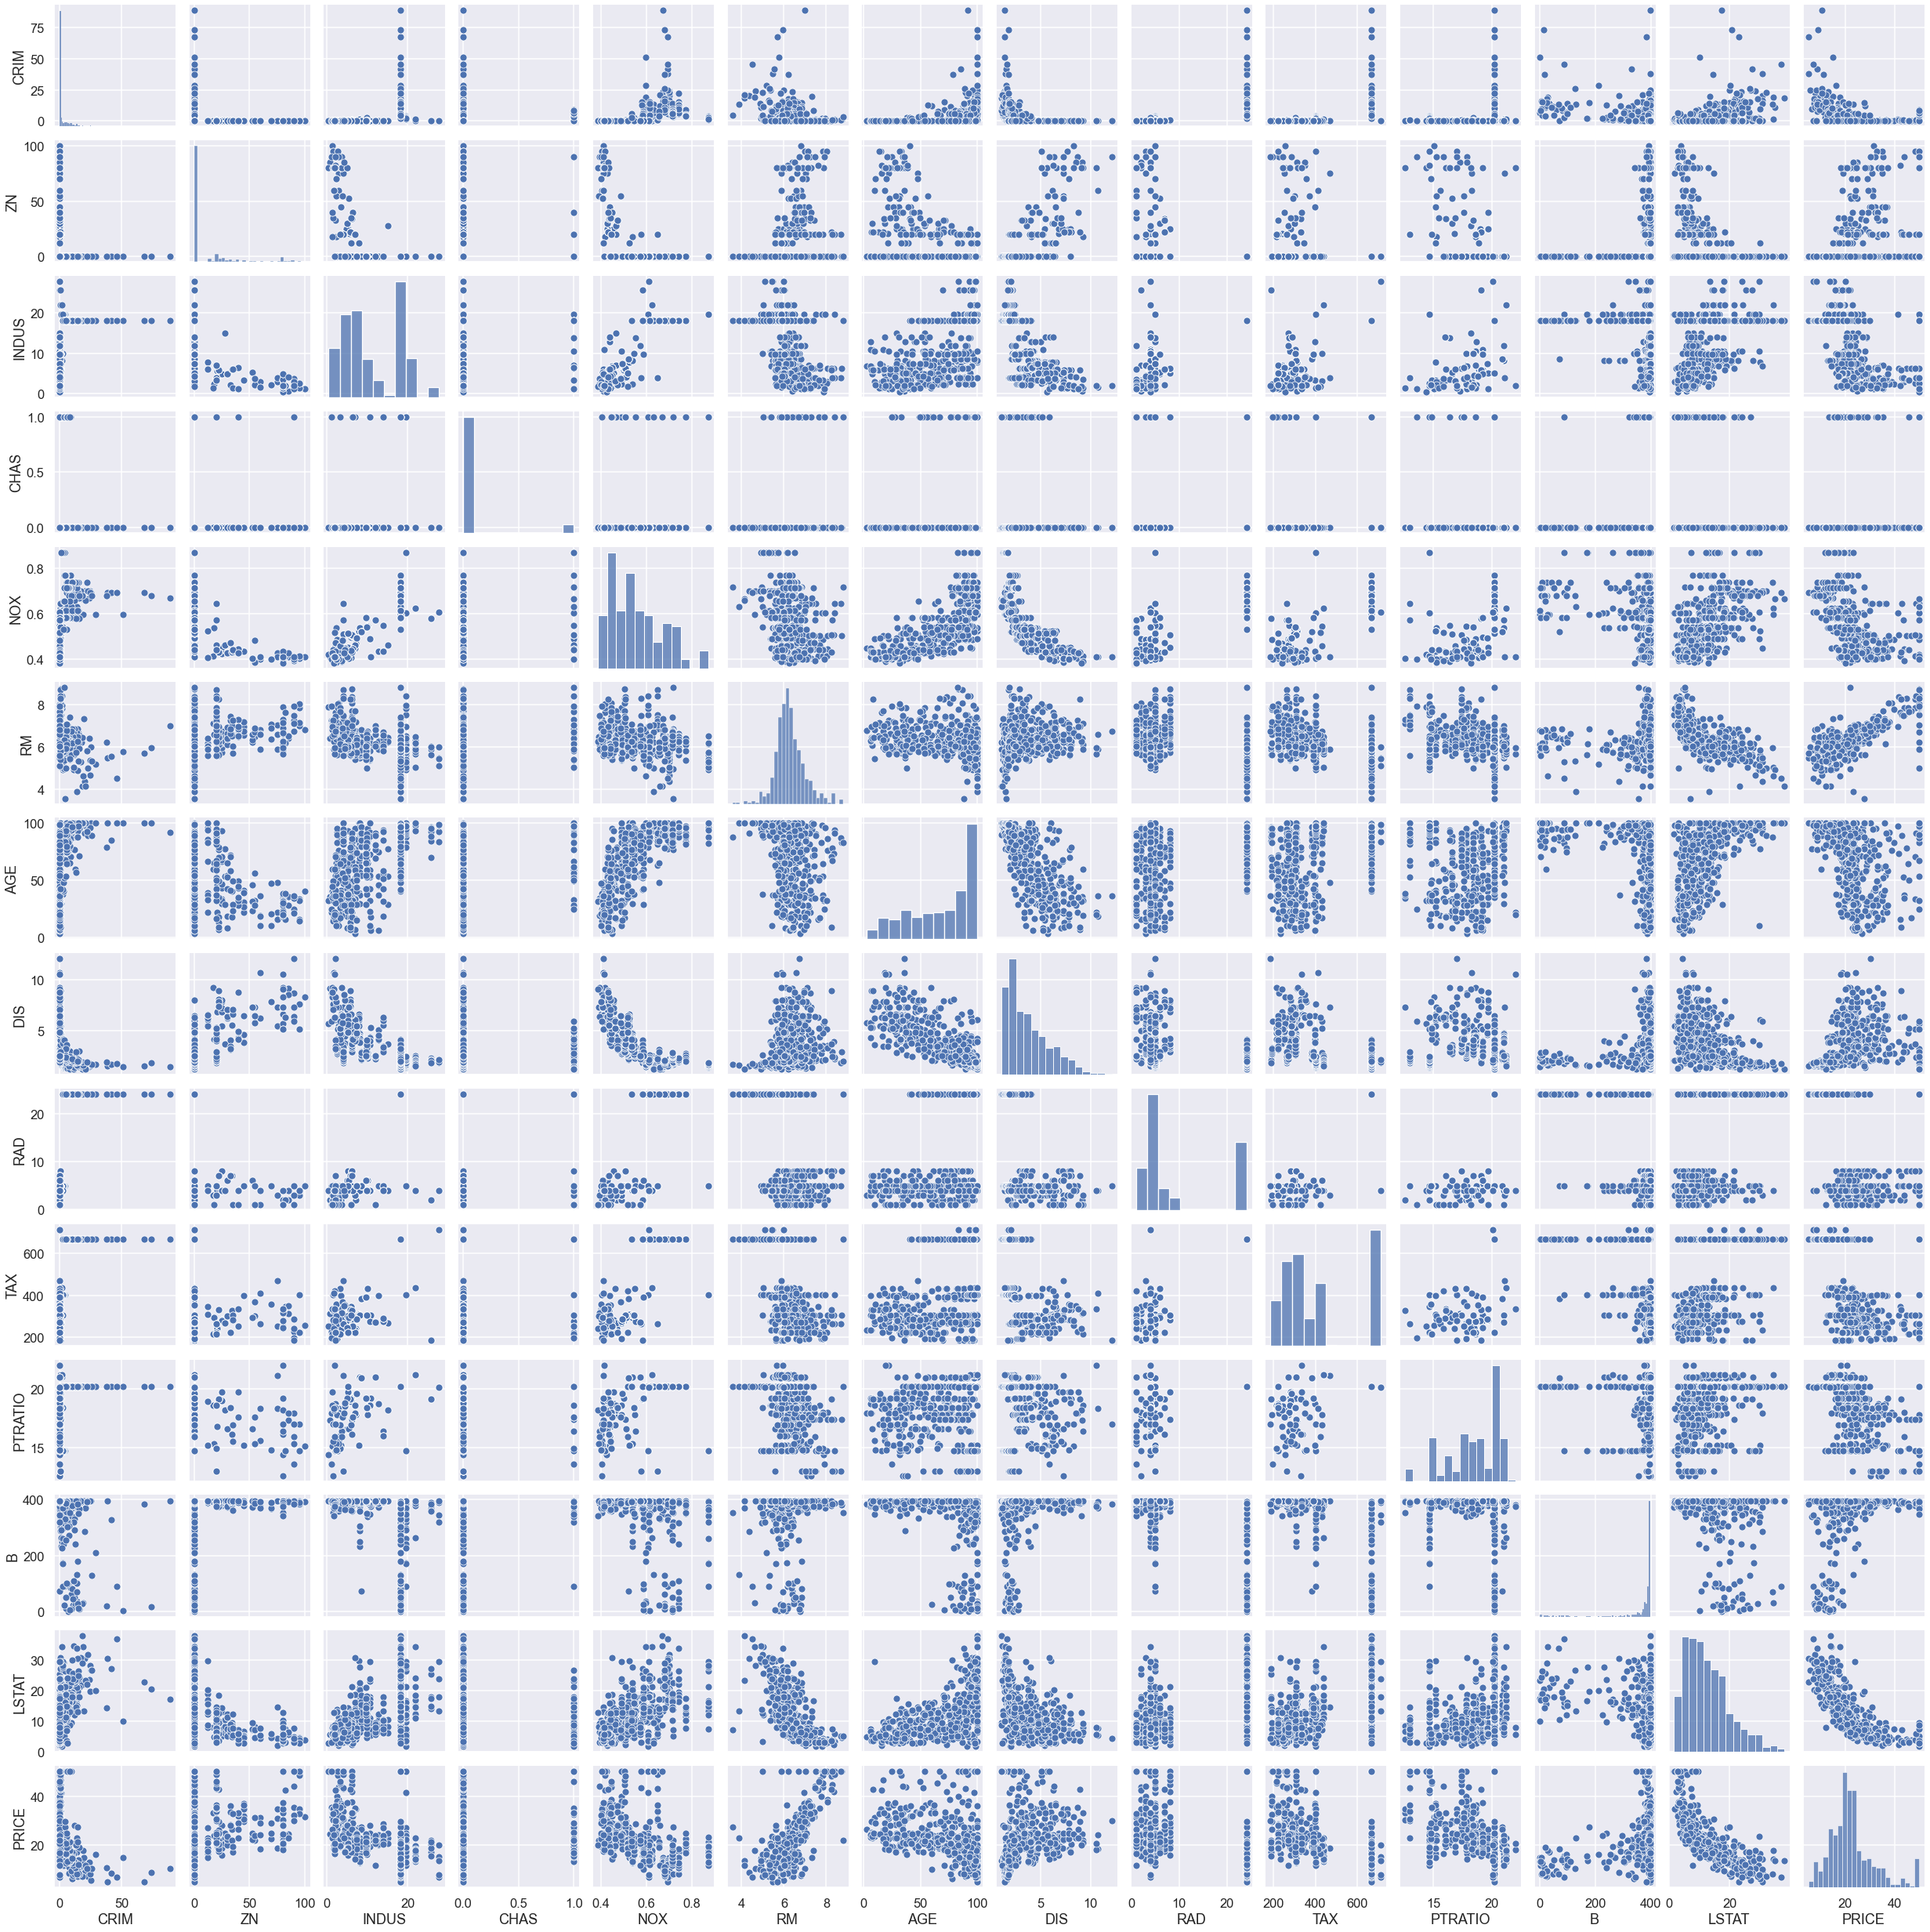

In [38]:
sns.pairplot(data)
plt.show()

## Training & Test Dataset Split


In [39]:
prices = data.PRICE
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state=10)

# % of training set
len(X_train) / len(features)

0.7984189723320159

In [40]:
# % of test dataset
len(X_test) / len(features)

0.2015810276679842

## Multivariable Regression

In [41]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

print("Training data r-squared:", regr.score(X_train, y_train))
print("Test data r-squared:", regr.score(X_test, y_test))

Intercept 36.53305138282439
Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628


## Data Transformations

In [42]:
data.PRICE.skew()

1.1080984082549072

In [43]:
y_log = np.log(data.PRICE)
y_log.head()
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [44]:
y_log.skew()

-0.33032129530987864

Text(0.5, 1.0, 'Log price with skew -0.33032129530987864')

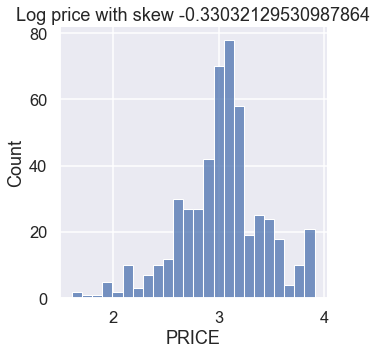

In [45]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')

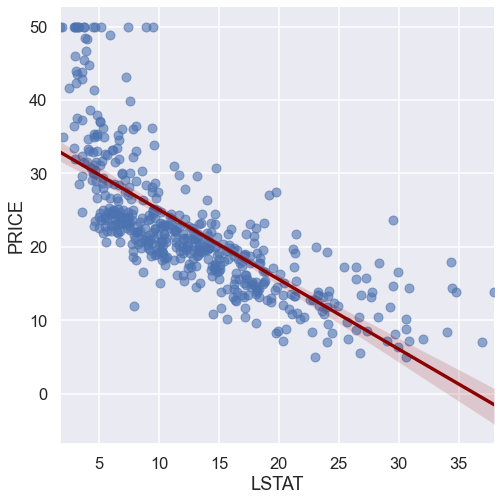

In [46]:
sns.lmplot(x="LSTAT", y="PRICE", data=data, height=7, scatter_kws={'alpha': 0.6}, line_kws={'color': 'darkred'})

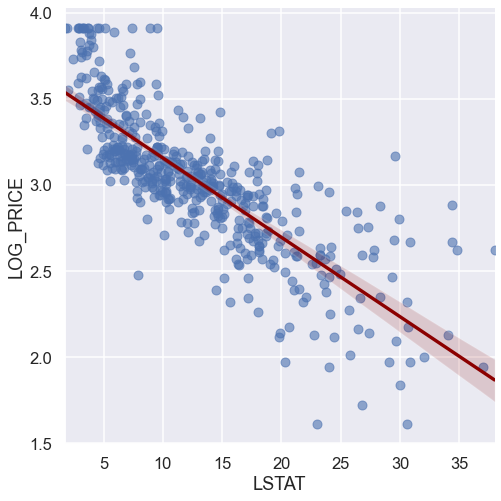

In [47]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x="LSTAT", y="LOG_PRICE", data=transformed_data, height=7, scatter_kws={'alpha': 0.6}, line_kws={'color': 'darkred'})

In [48]:
prices = np.log(data.PRICE)
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

print("Training data r-squared:", regr.score(X_train, y_train))
print("Test data r-squared:", regr.score(X_test, y_test))

Intercept 4.05994387177519
Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724


In [49]:
# Charles River Property Premium - reversing log transformation on Charles river coefficient
print(f"Property prices close to the river are higher by: {np.e**0.080475}")

Property prices close to the river are higher by: 1.0838017512597784


## p-values & Evaluating Coefficients

In [50]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# results.params
# results.pvalues
df_with_pvalues = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 4)})
df_with_pvalues

,coef,p-values
const,4.059944,0.0000
CRIM,-0.010672,0.0000
ZN,0.001579,0.0086
INDUS,0.002030,0.4445
CHAS,0.080331,0.0382
NOX,-0.704068,0.0000
RM,0.073404,0.0001
AGE,0.000763,0.2092
DIS,-0.047633,0.0000
RAD,0.014565,0.0000


## Testing for Multicollinearity: Variance Inflation Factor (VIF)

In [51]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932485

In [52]:
len(X_incl_const.columns)

VIFs = []
for i in range(len(X_incl_const.columns)):
    new_vif = variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)
    VIFs.append(new_vif)

    

df_with_pvalues['VIFs'] = VIFs
df_with_pvalues

,coef,p-values,VIFs
const,4.059944,0.0000,597.548713
CRIM,-0.010672,0.0000,1.714525
ZN,0.001579,0.0086,2.332822
INDUS,0.002030,0.4445,3.943449
CHAS,0.080331,0.0382,1.078813
NOX,-0.704068,0.0000,4.410321
RM,0.073404,0.0001,1.840405
AGE,0.000763,0.2092,3.326766
DIS,-0.047633,0.0000,4.222923
RAD,0.014565,0.0000,7.314300


In [53]:
X_incl_const

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,1.0,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,1.0,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,1.0,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,1.0,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


## Model Simplification & BIC

In [57]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

print(results.rsquared)
print(results.bic)

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

0.7930234826697582
-139.74997769478875


In [59]:
# Reduced model #1 excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

print(results.rsquared)
print(results.bic)

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

0.7927126289415163
-145.14508855591163


In [60]:
# Reduced model #2 excluding INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

print(results.rsquared)
print(results.bic)

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

0.7918657661852815
-149.49934294224656


In [61]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,4.056231,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010721,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001551,0.010,0.001551,0.010,0.001461,0.014
CHAS,0.082795,0.032,0.082795,0.032,0.086449,0.025
NOX,-0.673365,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.071739,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000766,0.207,0.000766,0.207,NaN,NaN
DIS,-0.049394,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014014,0.000,0.014014,0.000,0.013743,0.000
TAX,-0.000596,0.000,-0.000596,0.000,-0.000590,0.000


## Residuals & Residual Plots

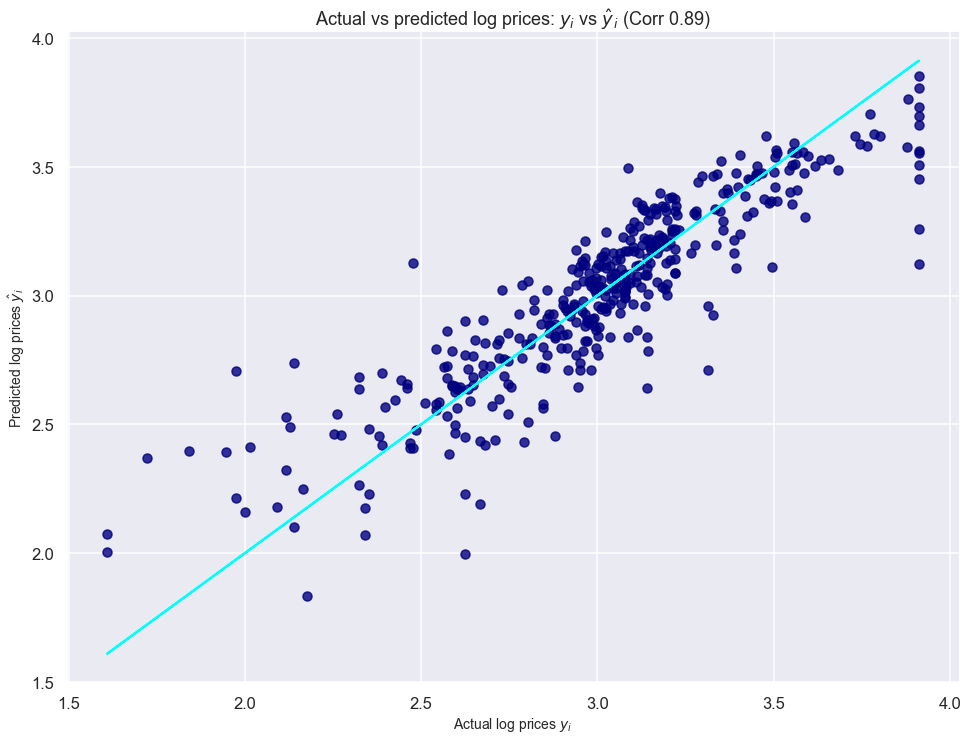

In [117]:
# Modified model: transformed using log prices & simplified (dropping 2 features)

prices = np.log(data.PRICE)
features = data.drop(['PRICE','INDUS','AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state=10)


X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues

results.resid

# Graph of actuals vs predicted prices
corr = round(y_train.corr(results.fittedvalues), 2)
corr

plt.figure(figsize=(16, 12))
plt.scatter(x=y_train, y=results.fittedvalues, c="navy", alpha=0.8)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs predicted log prices: $y _i$ vs $\hat y _i$ (Corr {corr})')

plt.show()

# Mean Squared Error & R-squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

Text(0.5, 1.0, 'Residuals vs fitted values')

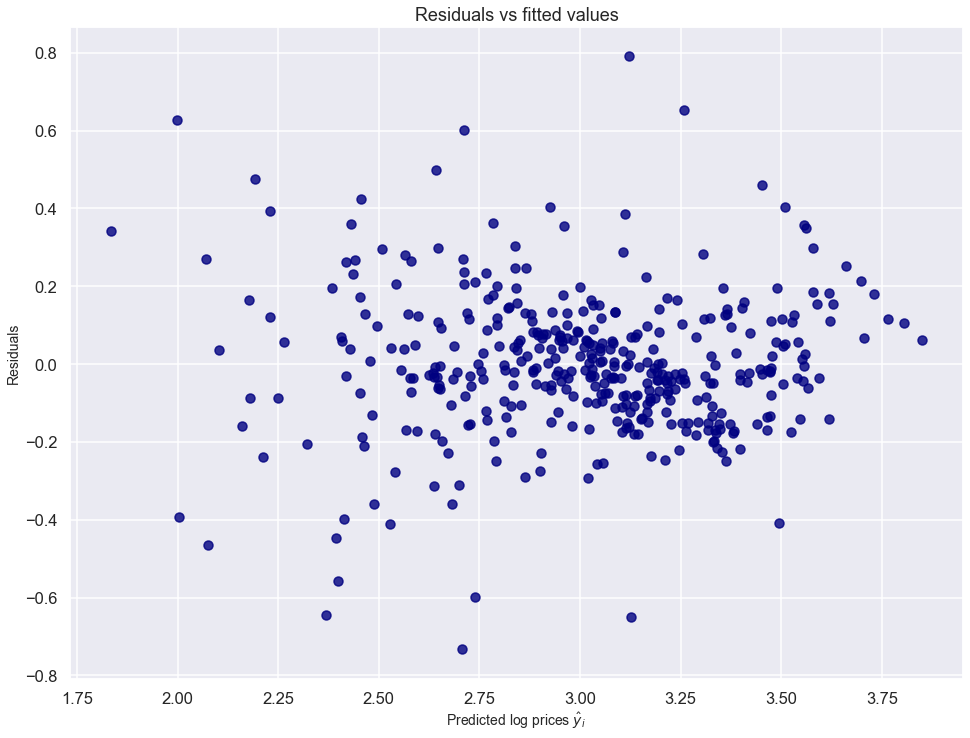

In [93]:
# Residuals vs predicted values
plt.figure(figsize=(16, 12))

plt.scatter(x=results.fittedvalues, y=results.resid, c="navy", alpha=0.8)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs fitted values')

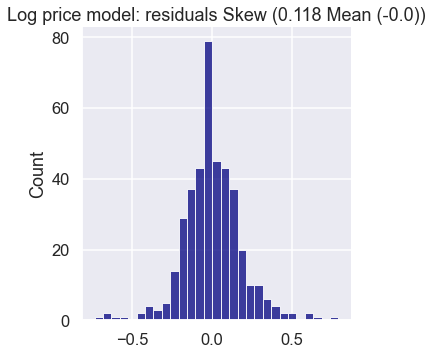

In [106]:
# Distribution of residuals (log prices): checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew} Mean ({resid_mean}))')

plt.show()

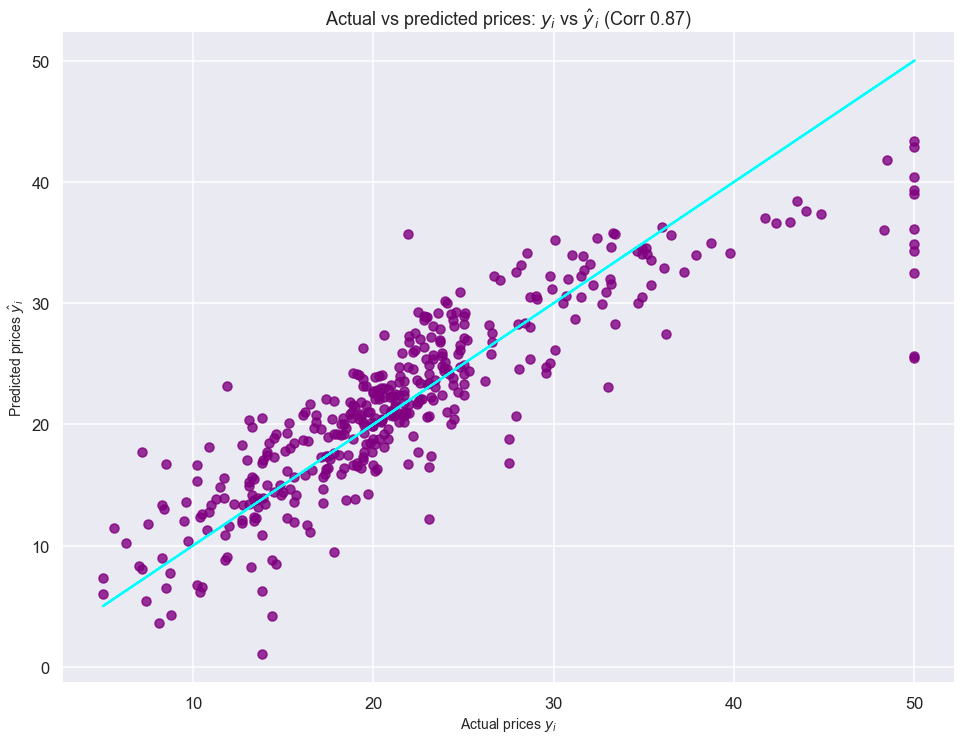

In [118]:
# Original model: not dropping data, no log values.

prices = data.PRICE
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues

results.resid

# Graph of actuals vs predicted prices
corr = round(y_train.corr(results.fittedvalues), 2)
corr

plt.figure(figsize=(16, 12))
plt.scatter(x=y_train, y=results.fittedvalues, c="purple", alpha=0.8)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Predicted prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs predicted prices: $y _i$ vs $\hat y _i$ (Corr {corr})')

plt.show()

# Mean Squared Error & R-squared
omitted_normal_mse = round(results.mse_resid, 3)
omitted_normal_rsquared = round(results.rsquared, 3)

Text(0.5, 1.0, 'Residuals vs fitted values')

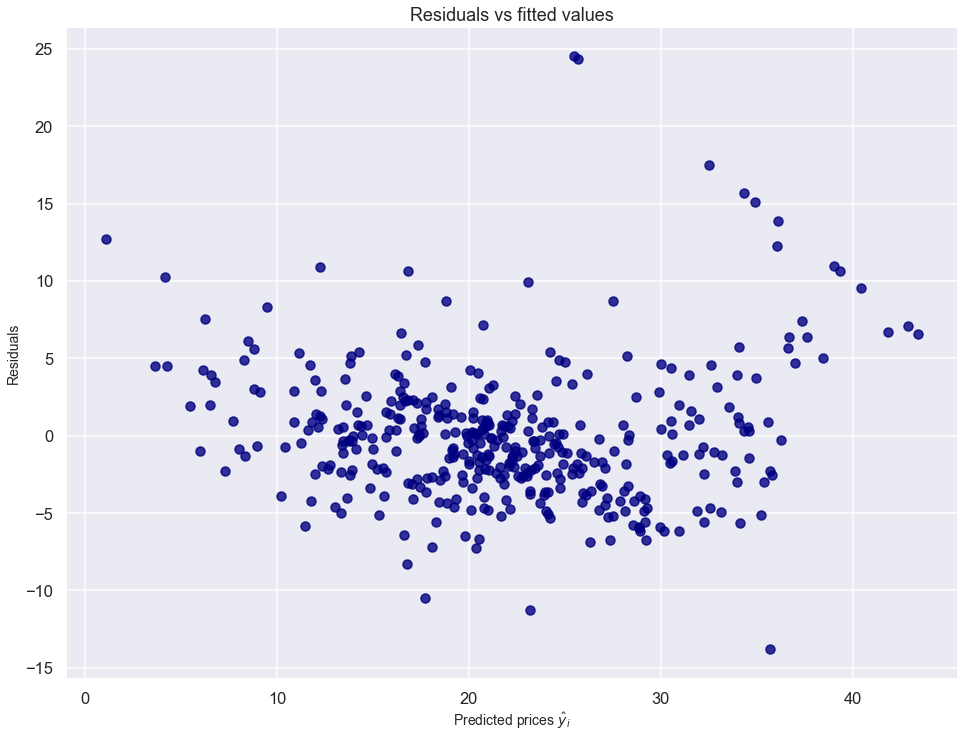

In [112]:
# Residuals vs predicted values: normal prices, not log
plt.figure(figsize=(16, 12))

plt.scatter(x=results.fittedvalues, y=results.resid, c="navy", alpha=0.8)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs fitted values')

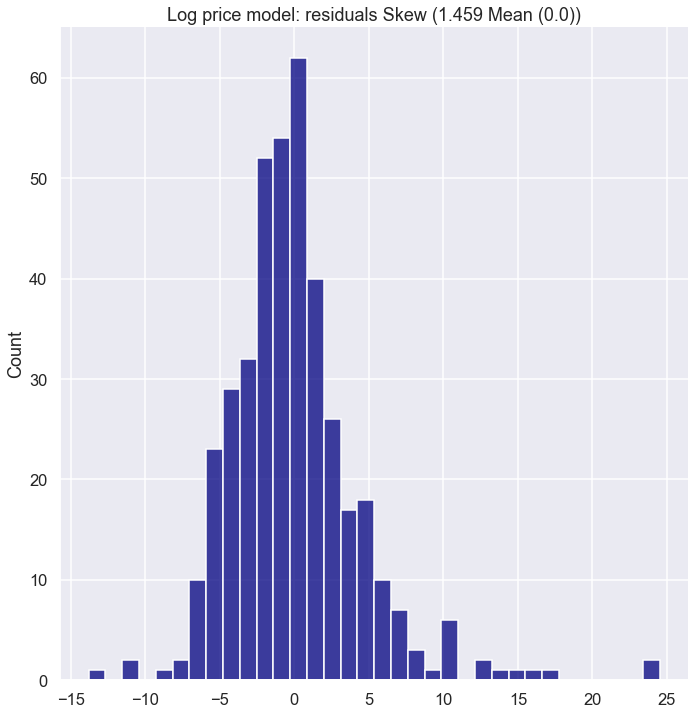

In [114]:
# Distribution of residuals (log prices): checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, color='navy', height=10)
plt.title(f'Log price model: residuals Skew ({resid_skew} Mean ({resid_mean}))')

plt.show()

TypeError: unsupported operand type(s) for ** or pow(): 'float' and 'tuple'

In [125]:
mse_stats = pd.DataFrame({'R-squared': [reduced_log_rsquared, omitted_normal_rsquared],
             'MSE': [reduced_log_mse, omitted_normal_mse],
             'RMSE': np.sqrt([reduced_log_mse, omitted_normal_mse])}, 
            index=['Reduced Log Model', 'Reduced Normal Model'])

In [139]:
# Calculating RMSE normal USD value:
rmse = mse_stats['RMSE'][0]
print(f"One std dev is: {rmse}")
print(f"Two std devs is: {2*rmse}")

print(f"Lower bound is: {round(1000*np.e**(np.log(30) - 2*rmse), 2)} KUSD")
print(f"Upper bound is: {round(1000*np.e**(np.log(30) + 2*rmse), 2)} KUSD")

One std dev is: 0.18708286933869708
Two std devs is: 0.37416573867739417
Lower bound is: 20635.89 KUSD
Upper bound is: 43613.34 KUSD
